使用随机梯度下降算法实现多项式回归  
可以参考下https://www.cnblogs.com/HuZihu/p/10829877.html 把代码重构为类
$$
f_{\theta}(x)=\theta_{0}+\theta_{1} x+\theta_{2} x^{2}
$$
$$
\theta_{j}:=\theta_{j}-\eta \sum_{i=1}^{n}\left(f_{\theta}\left(\boldsymbol{x}^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [9]:
# 读入训练数据
train = np.loadtxt('data/click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]


In [10]:
# 标准化
mu = train_x.mean()
sigma = train_x.std()


def standardize(x):
    return (x - mu) / sigma


train_z = standardize(train_x)


In [11]:
# 创建训练数据的矩阵
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

X = to_matrix(train_z)


In [12]:
# 预测函数
def f(x):
    return np.dot(x, theta)

# 均方误差


def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [ ]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    '''
    输入：X的维度是（n,m），n是样本数，m是每个样本的特征数
    '''
    np.random.seed(seed)
    n = X.shape[0]
    mini_batches = []
    #step1：打乱训练集
    #生成0~m-1随机顺序的值，作为我们的下标
    permutation = list(np.random.permutation(n))
    #得到打乱后的训练集
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation]
    #step2：按照batchsize分割训练集
    #得到总的子集数目，math.floor表示向下取整
    num_complete_minibatches = math.floor(n / mini_batch_size)
    for k in range(0, num_complete_minibatches):
        #冒号：表示取所有行，第二个参数a：b表示取第a列到b-1列，不包括b
        mini_batch_X = shuffled_X[k *
                                  mini_batch_size:(k+1) * mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size:(k+1) * mini_batch_size]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    #m%mini_batch_size != 0表示还有剩余的不够一个batch大小，把剩下的作为一个batch
    if n % mini_batch_size != 0:
        mini_batch_X = shuffled_X[mini_batch_size *
                                  num_complete_minibatches:, :]
        mini_batch_Y = shuffled_Y[mini_batch_size * num_complete_minibatches:]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


In [22]:
# 定义参数
ETA = 1e-3
seed=0
max_epoch=700
eplison=1e-2
mini_batch_size = 4


# 参数初始化
theta = np.random.rand(3)
error = MSE(X, train_y)
errors = []
epoch = 0
errors.append(error)
while epoch < max_epoch:
    seed = seed + 1
    minibatches = random_mini_batches(X, train_y, mini_batch_size, seed)

    for minibatch in minibatches:
        (minibatch_X, minibatch_Y) = minibatch
        theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2]-errors[-1]
    epoch +=1
    log = 'Epoch {} : theta = {}, diff = {:.4f}'
    print(log.format(epoch, theta, diff))
    if diff < eplison:
        break


Epoch 1 : theta = [40.21908272  9.37526456 39.81501739], diff = 62867.1466
Epoch 2 : theta = [72.57421968 17.80356176 68.20161572], diff = 37743.6904
Epoch 3 : theta = [99.44000813 25.58719756 88.22740098], diff = 23242.8658
Epoch 4 : theta = [122.05943887  32.73847865 102.01065686], diff = 14804.9244
Epoch 5 : theta = [141.37427441  39.28113895 111.14506224], diff = 9836.2311
Epoch 6 : theta = [158.09903581  45.24611744 116.82911963], diff = 6860.1919
Epoch 7 : theta = [172.77676668  50.66851248 119.9636722 ], diff = 5035.0692
Epoch 8 : theta = [185.82106559  55.58540958 121.22537637], diff = 3880.1138
Epoch 9 : theta = [197.54777091  60.03435545 121.12205767], diff = 3119.9852
Epoch 10 : theta = [208.1988479   64.05230838 120.0344164 ], diff = 2596.3451
Epoch 11 : theta = [217.96039965  67.67493784 118.24744821], diff = 2217.6000
Epoch 12 : theta = [226.9762494   70.93617851 115.97411531], diff = 1930.3144
Epoch 13 : theta = [235.35818539  73.86796814 113.37317894], diff = 1702.9373


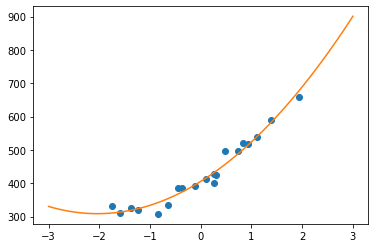

In [23]:
# 绘图确认
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()


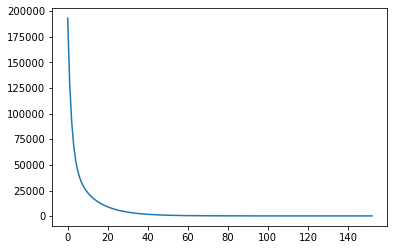

In [24]:
# MSE 不断在下降
plt.clf()
x = np.arange(len(errors))
plt.plot(x, errors)
plt.show()
